**This notebook is also available at [this link](https://github.com/mrmaheshrajput/quantium) for better viewing**

<img src="https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/9F4wA4B5J6Kgmef3k/White%20logo%20croppd.png" style="background: black ; width: 200px;padding: 5px;border-radius: 5px;">

<h1>Task 1 : Data preparation and customer analytics</h1>
<p>Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.</p>

<b>CLIENT :</b>Category Manager for Chips

<b>OBJECTIVE :</b>Better understand the types of customers who purchase Chips and their purchasing behaviour within the region

<b>ACTION :</b>The insights from following analysis will feed into the supermarket’s strategic plan for the chip category in the next half year

<b>Email from your supervisor/manager, Zilinka :</b>
<pre>
<font color='blue'>
Hi, 

Welcome again to the team, we love having new graduates join us! 

I just wanted to send a quick follow up from our conversation earlier with a few pointers around the key areas of this task to make sure we set you up for success. 

Below I have outlined your main tasks along with what we should be looking for in the data for each. 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

Looking forward to reviewing your work. 

Thanks, 

Zilinka
</font>
</pre>

<b>TASK :</b>Present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

<b>OUR APPROACH :</b>
* Get high level overview of data like null values, column types and class distributions,
* Clean the data, remove duplicates, remove outliers, explore every feature, create new features,
* Review every category to understand current purchasing trends by answering few questions

***

<b>Importing Libraries</b>

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.express as px

<b>Reading Datasets</b>

In [2]:
raw_pur = pd.read_csv('QVI_purchase_behaviour.csv')
raw_tra = pd.read_excel('QVI_transaction_data.xlsx')

***
<b>Now we will focus only on Purchase data and perform Univarite Analysis</b>

In [3]:
print(raw_pur.shape)
raw_pur.head(3)

(72637, 3)


LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER
0            1000  YOUNG SINGLES/COUPLES          Premium
1            1002  YOUNG SINGLES/COUPLES       Mainstream
2            1003         YOUNG FAMILIES           Budget

<b>LYLTY_CARD_NBR</b> : Unique identifier of each customer

<b>LIFESTAGE</b> : Social and demographic life stage of a customer. This attribute identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school. 

<b>PREMIUM_CUSTOMER</b> : Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options. 

<br>

<b>Check for null values and types of columns we have</b>

In [4]:
raw_pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
raw_pur.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<b>We did not see any null values but since LIFESTAGE feature is of object type, we also check for values with just space</b>

In [6]:
raw_pur[raw_pur.LIFESTAGE == ' ']

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []

<b>Check for entries in PREMIUM_CUSTOMER with space</b>

In [7]:
raw_pur[raw_pur.PREMIUM_CUSTOMER == ' ']

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []

<b>Check for duplicate entries</b>

In [8]:
raw_pur[raw_pur.duplicated()]

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []

<b>Check for entries with duplicate Loyality Card Number i.e. same customer</b>

In [9]:
raw_pur[raw_pur.duplicated(['LYLTY_CARD_NBR'])]

Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []

<br>

<b>We check how many customers per lifestage are there in our dataset</b>

We find that we have maximum of Retirees, old singles/couples and young singles/couples in our sample set. The lowest records we have are of new families and midage singles/couples.


RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


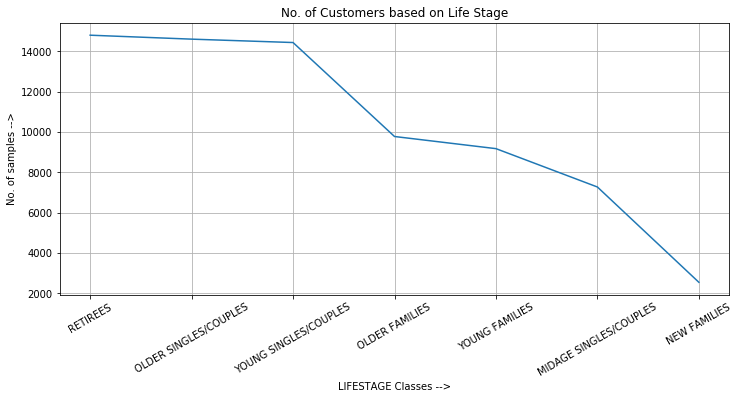

In [10]:
print(raw_pur.LIFESTAGE.value_counts())

plt.figure(figsize=(12,5))
plt.plot(*zip(*dict(raw_pur.LIFESTAGE.value_counts()).items()))

plt.title('No. of Customers based on Life Stage')
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('LIFESTAGE Classes -->')
plt.ylabel('No. of samples -->')
plt.grid()

plt.show()

<b>Now we check distributions of number of samples for each customer segment</b>

We observe that we have maximum samples from Mainstream segment and lowest from Premium.

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


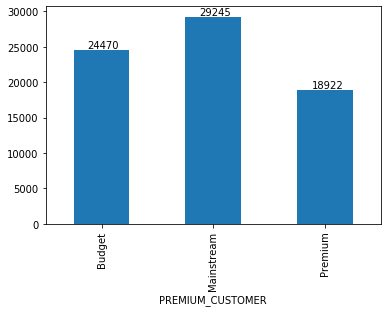

In [11]:
print(raw_pur.PREMIUM_CUSTOMER.value_counts())

ax = raw_pur.groupby("PREMIUM_CUSTOMER")['LYLTY_CARD_NBR'].count().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(14, 1), textcoords='offset points')

<br>

<b>No. of customers with different lifestage attribute in each segment</b>

In Mainstream segment we have maximum 8088 YOUNG SINGLES/COUPLES, followed by 6479 RETIREES and 4930 OLD SINGLES/COUPLES

In Budget segment that has next highest number of samples after Mainstream we have maximum of OLDER SINGLES/COUPLES with count of 4929, closely followed by 4675 OLDER FAMILIES and 4454 RETIREES.

In Premium segment we again see highest samples from OLDER SINGLES/COUPLES with count of 4750, followed by RETIREES and YOUNG SINGLES/COUPLES with counts of 3872 and 2574 respectively.


In [12]:
fig = px.sunburst(raw_pur, path=['PREMIUM_CUSTOMER','LIFESTAGE'])
fig.show()

<hr>

<b>Now we will explore transactional data before combining both dataframes.</b>

In [13]:
print(raw_tra.shape)
raw_tra.head()

(264836, 8)


DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

<b>DATE</b> : Date of the transaction in excel format

<b>STORE_NBR</b> : Store number from which the corrosponding transaction was done

<b>LYLTY_CARD_NBR</b> : Unique identifier of each customer

<b>TXN_ID</b> : Taxation ID i.e. a number against each transaction, multiple products will have same transaction Id if bought together

<b>PROD_NBR</b> : Product number

<b>PROD_NAME</b> : Name of the product, it also contains brand name, variety of product and weight of product

<b>PROD_QTY</b> : No. of same products bought

<b>TOT_SALES</b> : $$

<br>

<b>Check for null values and types of columns we have</b>

In [14]:
raw_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [15]:
raw_tra.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

<b>We check high level statistics of the data, like mean, standard deviation, quantiles and mininum, maximum.</b>

In [16]:
raw_tra.describe(include='all')

DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count   264836.000000  264836.00000    2.648360e+05  2.648360e+05   
unique            NaN           NaN             NaN           NaN   
top               NaN           NaN             NaN           NaN   
freq              NaN           NaN             NaN           NaN   
mean     43464.036260     135.08011    1.355495e+05  1.351583e+05   
std        105.389282      76.78418    8.057998e+04  7.813303e+04   
min      43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%      43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%      43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%      43555.000000     203.00000    2.030942e+05  2.027012e+05   
max      43646.000000     272.00000    2.373711e+06  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY  \
count   264836.000000                                  264836  264836.000000   
unique            NaN                                     114            NaN   
top               NaN  Kettle Mozzarella   Basil & Pesto 175g            NaN   
freq              NaN                                    3304            NaN   
mean        56.583157                                     NaN       1.907309   
std         32.826638                                     NaN       0.643654   
min          1.000000                                     NaN       1.000000   
25%         28.000000                                     NaN       2.000000   
50%         56.000000                                     NaN       2.000000   
75%         85.000000                                     NaN       2.000000   
max        114.000000                                     NaN     200.000000   

            TOT_SALES  
count   264836.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         7.304200  
std          3.083226  
min          1.500000  
25%          5.400000  
50%          7.400000  
75%          9.200000  
max        650.000000

***

<b>Now we will explore each and every feature seperately by doing Univariate Analysis</b>

<b>PROD_NAME</b>

We observe that are many products in our dataset are other than Chips, since we are only focusing on Chips so we remove all other non-chips items like Salsa, Cheese Box, Burger rings etc from the dataset.

In [17]:
to_remove = list()

for i in raw_tra.PROD_NAME:
    if 'Salsa' in i: to_remove.extend(i)
        
len(to_remove)

650433

In [18]:
to_remove.extend(['Cheezels Cheese Box 125g', 
             'Burger Rings 220g', 
             'Twisties Cheese     270g', 
             'Twisties Cheese     Burger 250g', 
             'Twisties Chicken270g'])

raw_tra = raw_tra[~raw_tra['PROD_NAME'].isin(to_remove)]
raw_tra.shape

(252364, 8)

After removing all unrequired samples we are left with 252364 samples.

<br>

<b>Product name also has brand name and product weight or pack size which can be used later in multivariate analysis, so we extract these features from PROD_NAME column.</b>

<br>

<b>Adding PACK_SIZE feature</b>

In [19]:
raw_tra['PACK_SIZE'] = raw_tra.PROD_NAME.map( lambda x: int(''.join(re.findall('[0-9]',x))) )

Checking max and minimum pack sizes for sanity check

In [20]:
max(raw_tra.PACK_SIZE),min(raw_tra.PACK_SIZE)

(380, 70)

Now we check for number of transactions based on pack size

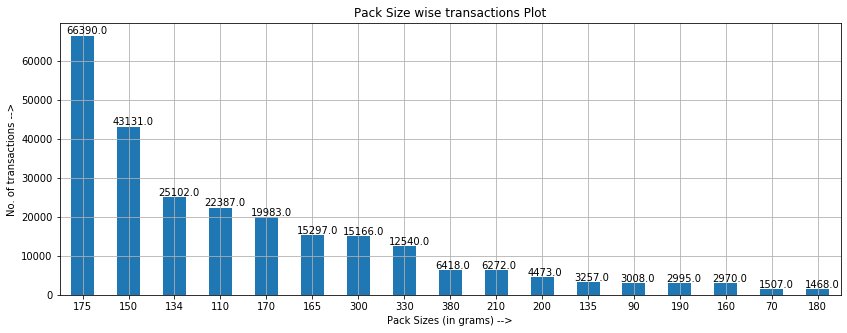

In [21]:
pack_size_trans = raw_tra.PACK_SIZE.value_counts()

plt.figure(figsize=(14,5))
ax = pack_size_trans.plot.bar(stacked=True)
plt.xticks(range(len(pack_size_trans)), pack_size_trans.index, rotation=0)
plt.xlabel('Pack Sizes (in grams) -->')
plt.ylabel('No. of transactions -->')
plt.title('Pack Size wise transactions Plot')
plt.grid()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(-5, 1), textcoords='offset points')

plt.show()

<br>

<b>Adding BRAND_NAME feature</b>

Before adding brand name we clean incorrectly spelled brand names

In [22]:
raw_tra.PROD_NAME = raw_tra.PROD_NAME.map(lambda x: re.sub('Snbts','Sunbites',x))
raw_tra.PROD_NAME = raw_tra.PROD_NAME.map(lambda x: re.sub('Dorito Corn','Doritos Corn',x))
raw_tra.PROD_NAME = raw_tra.PROD_NAME.map(lambda x: re.sub('Infzns','Infuzions',x))
raw_tra.PROD_NAME = raw_tra.PROD_NAME.map(lambda x: re.sub('Smith Crinkle','Smiths Crinkle',x))
raw_tra.PROD_NAME = raw_tra.PROD_NAME.map(lambda x: re.sub('GrnWves','Grain Waves',x))

We take first word of PROD_NAME feature and add that as brand name. For some brand names with more than one word we replace them with correct names and decontract the required brand names.

In [23]:
raw_tra['BRAND_NAME'] = raw_tra.PROD_NAME.map(lambda x: ' '.join(x.split()[:1]))

raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('Old', 'Old El')
raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('Grain', 'Grain Waves')
raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('Red', 'Red Rock Deli')
raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('RRD', 'Red Rock Deli')
raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('French', 'French Fries')
raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('Natural', 'Natural Chip Co')
raw_tra.BRAND_NAME = raw_tra.BRAND_NAME.replace('NCC', 'Natural Chip Co')

<b>Most popular brands by number of transactions</b>

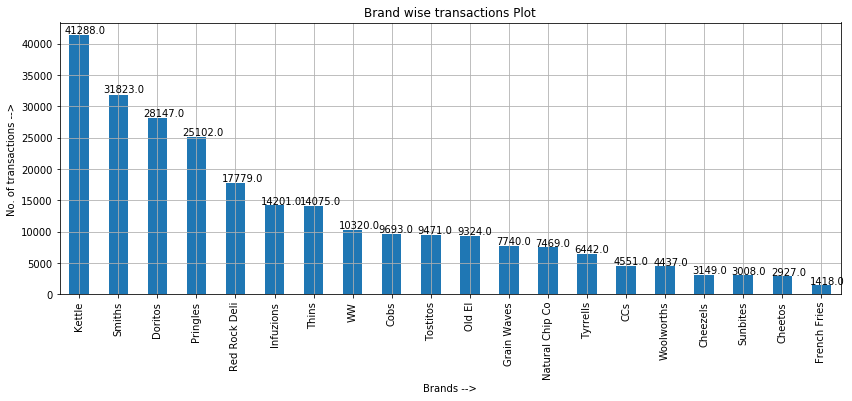

In [24]:
brands_trans = raw_tra.BRAND_NAME.value_counts()

plt.figure(figsize=(14,5))
ax = brands_trans.plot.bar(stacked=True)
plt.xticks(range(len(brands_trans)), brands_trans.index, rotation=90)
plt.xlabel('Brands -->')
plt.ylabel('No. of transactions -->')
plt.title('Brand wise transactions Plot')
plt.grid()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(-5, 1), textcoords='offset points')

plt.show()

<br>

<b>PROD_QTY</b>

<b>We check in what quantities people are buying chips?</b>

2      224901
1       26251
5         423
3         410
4         377
200         2
Name: PROD_QTY, dtype: int64


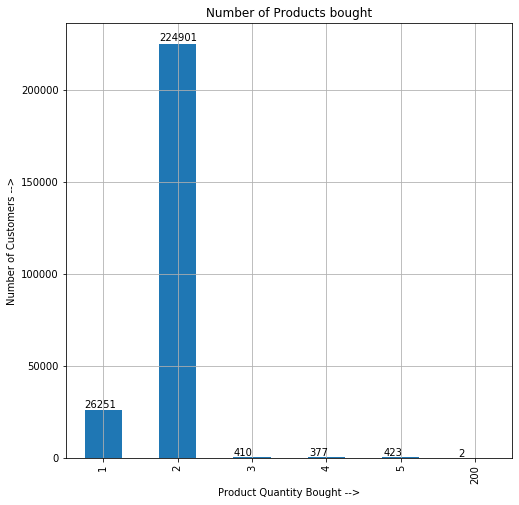

In [25]:
print(raw_tra.PROD_QTY.value_counts())

plt.figure(figsize=(8,8))
ax = raw_tra.groupby("PROD_QTY")['PROD_QTY'].count().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(0, 1), textcoords='offset points')
    
plt.title('Number of Products bought')
plt.ylabel('Number of Customers -->')
plt.xlabel('Product Quantity Bought -->')
plt.grid()

plt.show()

It seems mostly people buy chips in quantity of 2, with some exceptions of 1,3,4 and even 5.

We see there are two transactions with quantity as 200. We check below what has been purchased in this large quantity.

In [26]:
raw_tra[raw_tra.PROD_QTY == 200]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                               PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
69762  Doritos Corn Chp     Supreme 380g       200      650.0        380   
69763  Doritos Corn Chp     Supreme 380g       200      650.0        380   

      BRAND_NAME  
69762    Doritos  
69763    Doritos

One customer with loyality card number 226000 has bought 200 Doritos chips packet on 19-August-2018 and again same item  from same store in the same quantity on 20-May-2019. Inflated sales number suggest this is not a typing error and an actual sale.

Now we examine other transactions of the same customer to identify the pattern if there is any.

In [27]:
raw_tra[raw_tra.LYLTY_CARD_NBR == 226000]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                               PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
69762  Doritos Corn Chp     Supreme 380g       200      650.0        380   
69763  Doritos Corn Chp     Supreme 380g       200      650.0        380   

      BRAND_NAME  
69762    Doritos  
69763    Doritos

Since we did not find any other transaction from same customer we can assume that this is not a regular retail customer. We remove this because we are only analyzing the retail behaviour of consumers right now and these two observations may skew our statistical parameters.

In [28]:
raw_tra.drop(raw_tra[raw_tra.PROD_QTY == 200].index.values, inplace=True)

raw_tra.shape

(252362, 10)

<br>

<b>TOT_SALES</b>

We check the inter-quantile range of total sales feature through box plot

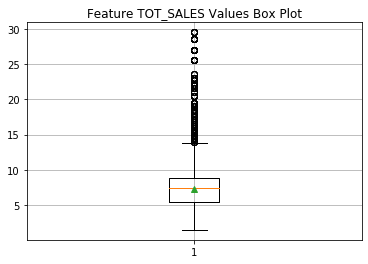

In [29]:
total_sales = sorted(raw_tra.TOT_SALES)

plt.boxplot(total_sales, showmeans = True)
plt.grid()
plt.title('Feature TOT_SALES Values Box Plot')
plt.show()

In [30]:
min(total_sales), max(total_sales)

(1.5, 29.5)

<br>

<b>PROD_NBR</b>

Product number is the unique number given to each product. Here we find out the most popular and least popular products. 

In [31]:
product_numbers = dict(zip(raw_tra.groupby('PROD_NBR')['PROD_NBR'].count().index, raw_tra.groupby('PROD_NBR')['PROD_QTY'].sum()))
product_numbers = {k: v for k, v in sorted(product_numbers.items(), key=lambda item: item[1], reverse=True)}

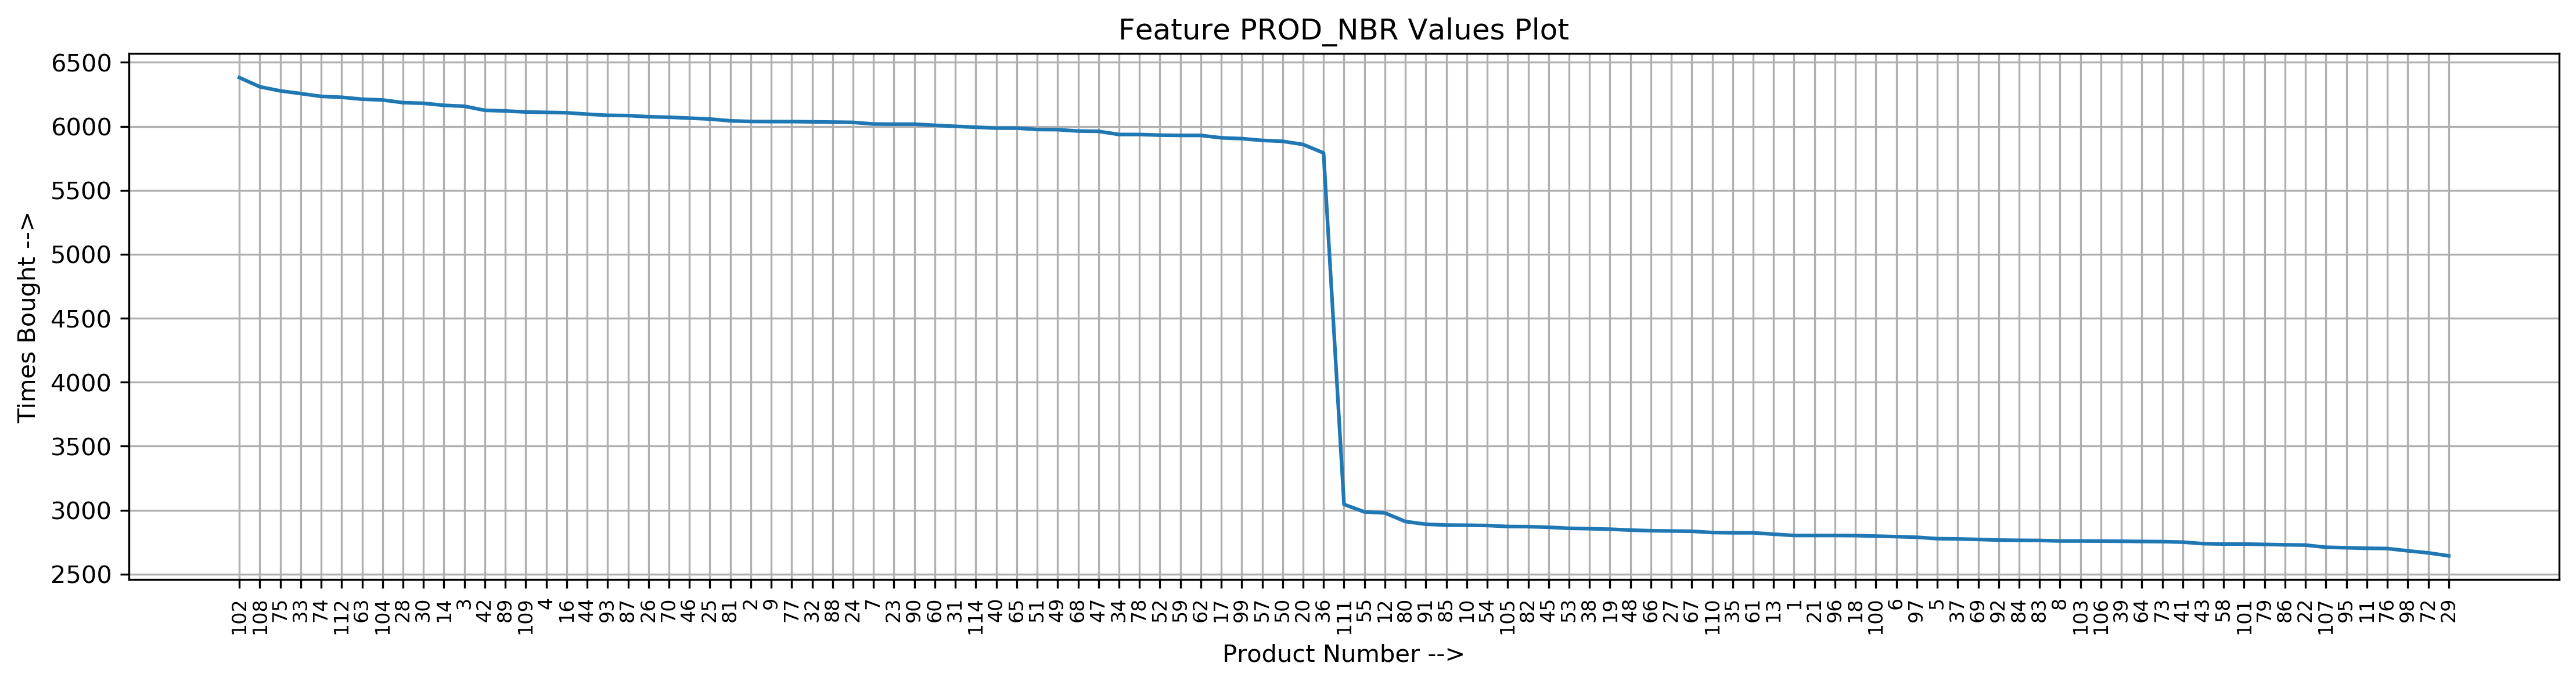

In [32]:
plt.figure(figsize=(18,4),dpi=300)
plt.plot(list(product_numbers.values()))
plt.grid()

plt.xlabel('Product Number -->')
plt.xticks(range(len(product_numbers)), product_numbers.keys(), fontsize=8, rotation=90)
plt.ylabel('Times Bought -->')
plt.title('Feature PROD_NBR Values Plot')

plt.show()

Most Popular Items with number of quantities bought

In [33]:
threshold = 6000

for pro,qunty in product_numbers.items():
    if qunty > threshold: print(raw_tra[raw_tra.PROD_NBR == pro]['PROD_NAME'].iloc[0] + ' : ' + str(qunty))

Kettle Mozzarella   Basil & Pesto 175g : 6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g : 6309
Cobs Popd Sea Salt  Chips 110g : 6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g : 6256
Tostitos Splash Of  Lime 175g : 6234
Tyrrells Crisps     Ched & Chives 165g : 6227
Kettle 135g Swt Pot Sea Salt : 6212
Infuzions Thai SweetChili PotatoMix 110g : 6206
Thins Potato Chips  Hot & Spicy 175g : 6185
Doritos Corn Chips  Cheese Supreme 170g : 6180
Smiths Crnkle Chip  Orgnl Big Bag 380g : 6164
Kettle Sensations   Camembert & Fig 150g : 6157
Doritos Corn Chip Mexican Jalapeno 150g : 6125
Kettle Sweet Chilli And Sour Cream 175g : 6120
Pringles Barbeque   134g : 6112
Doritos Corn Chp     Supreme 380g : 6109
Smiths Crinkle Chips Salt & Vinegar 330g : 6106
Thins Chips Light&  Tangy 175g : 6095
Doritos Corn Chip Southern Chicken 150g : 6086
Infuzions BBQ Rib   Prawn Crackers 110g : 6084
Pringles Sweet&Spcy BBQ 134g : 6075
Tyrrells Crisps     Lightly Salted 165g : 6071
Kettle Original 175g : 6064
Pringles S

Least popular items

In [34]:
threshold = 2800

for pro,qunty in product_numbers.items():
    if qunty < threshold: print(raw_tra[raw_tra.PROD_NBR == pro]['PROD_NAME'].iloc[0] + ' : ' + str(qunty))

Smiths Crinkle Cut  Chips Chs&Onion170g : 2797
RRD Lime & Pepper   165g : 2793
RRD Salt & Vinegar  165g : 2788
Natural Chip        Compny SeaSalt175g : 2777
Smiths Thinly       Swt Chli&S/Cream175G : 2775
Smiths Chip Thinly  S/Cream&Onion 175g : 2771
WW Crinkle Cut      Chicken 175g : 2766
Grain Waves Plus Btroot & Chilli Jam 180g : 2764
WW D/Style Chip     Sea Salt 200g : 2763
Smiths Crinkle Cut  Chips Original 170g : 2759
RRD Steak &         Chimuchurri 150g : 2759
Natural ChipCo      Hony Soy Chckn175g : 2758
Smiths Crinkle Cut  Tomato Salsa 150g : 2757
Red Rock Deli SR    Salsa & Mzzrlla 150g : 2755
Smiths Crinkle Cut  Salt & Vinegar 170g : 2754
Doritos Salsa Mild  300g : 2750
Smiths Crinkle Cut   Bolognese 150g : 2738
Red Rock Deli Chikn&Garlic Aioli 150g : 2735
Doritos Salsa       Medium 300g : 2735
Smiths Chip Thinly  CutSalt/Vinegr175g : 2732
Cheetos Puffs 165g : 2729
Thins Chips         Originl saltd 175g : 2727
Smiths Crinkle Cut  French OnionDip 150g : 2710
Sunbites Whlegrn 

<b>TXN_ID</b>

Unique Id for every transaction. Two different products will have same TXN_ID if they are bought together in a bundle.

In [35]:
raw_tra.TXN_ID.isna().sum()

0

We check for how many different items can be bought under one TXN_ID and maximum is 3.

In [36]:
raw_tra.TXN_ID.value_counts().unique()

array([3, 2, 1], dtype=int64)

<br>

<b>STORE_NBR</b>

Here we examine the stores that are doing maximum number of transactions (not sales)

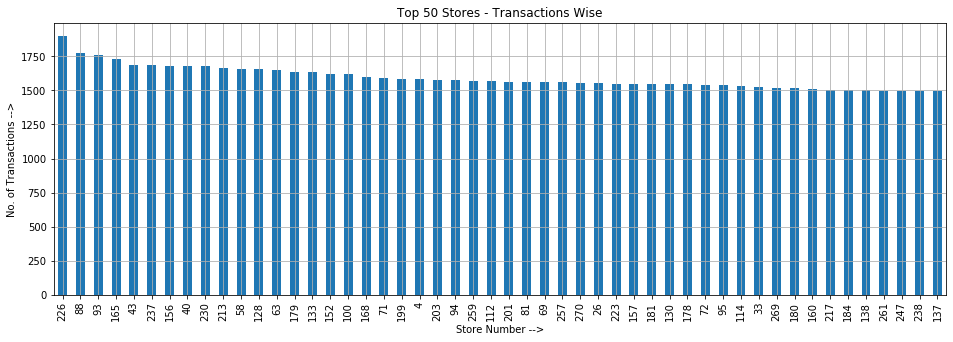

In [37]:
plt.figure(figsize=(16,5))
raw_tra.STORE_NBR.value_counts().iloc[:50].plot.bar()

plt.xlabel('Store Number -->')
plt.ylabel('No. of Transactions -->')
plt.title('Top 50 Stores - Transactions Wise')
plt.grid()

plt.show()

Stores that have lowest number of transactions

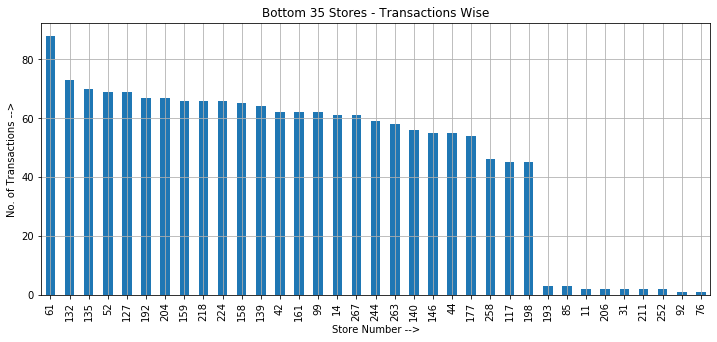

In [38]:
plt.figure(figsize=(12,5))
raw_tra.STORE_NBR.value_counts().iloc[-35:].plot.bar()

plt.xlabel('Store Number -->')
plt.ylabel('No. of Transactions -->')
plt.title('Bottom 35 Stores - Transactions Wise')
plt.grid()

plt.show()

<b>Stores that are doing maximum sales</b>

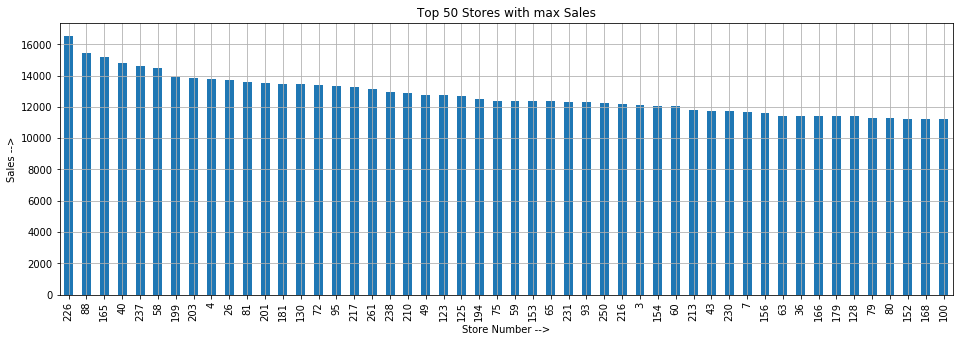

In [39]:
store_sales = dict(raw_tra.groupby('STORE_NBR')['TOT_SALES'].sum())
store_sales = {k:v for k,v in sorted(store_sales.items(), key=lambda x:x[1], reverse=True)}

no_of_top = 50

plt.figure(figsize=(16,5))
pd.Series(store_sales).iloc[:no_of_top].plot.bar()

plt.xlabel('Store Number -->')
plt.ylabel('Sales -->')
plt.title('Top %s Stores with max Sales' % str(no_of_top))
plt.grid()

plt.show()

Which brand and items our top selling store 226 is selling ?

In [40]:
raw_tra[raw_tra.STORE_NBR == 226]['BRAND_NAME'].value_counts().iloc[:15]

Kettle         444
Pringles       274
Doritos        261
Thins          155
Infuzions      150
Smiths         115
Cobs           113
Tostitos       104
Old El         104
Tyrrells        87
Grain Waves     64
Cheezels        30
Name: BRAND_NAME, dtype: int64

In [41]:
raw_tra[raw_tra.STORE_NBR == 226]['PROD_NAME'].value_counts().iloc[:15]

Tyrrells Crisps     Ched & Chives 165g       49
Thins Chips Seasonedchicken 175g             47
Tostitos Splash Of  Lime 175g                45
Infuzions Crn Crnchers Tangy Gcamole 110g    44
Kettle Tortilla ChpsFeta&Garlic 150g         44
Smiths Crinkle Chips Salt & Vinegar 330g     44
Grain Waves         Sweet Chilli 210g        42
Doritos Corn Chips  Nacho Cheese 170g        41
Cobs Popd Sea Salt  Chips 110g               40
Smiths Crnkle Chip  Orgnl Big Bag 380g       40
Kettle Tortilla ChpsHny&Jlpno Chili 150g     40
Doritos Corn Chp     Supreme 380g            39
Old El Paso Salsa   Dip Chnky Tom Ht300g     39
Infuzions Thai SweetChili PotatoMix 110g     38
Kettle Sensations   Camembert & Fig 150g     38
Name: PROD_NAME, dtype: int64

<br>

<b>DATE</b>

Date is given to us in excel format, so we decode it into standard format and extract year, month, day of month & year as seperate features to understand time based customer behaviour.

In [42]:
raw_tra['YEAR'] = raw_tra.DATE.map(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2).timetuple().tm_year)
raw_tra['MONTH'] = raw_tra.DATE.map(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2).timetuple().tm_mon)
raw_tra['M_DAY'] = raw_tra.DATE.map(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2).timetuple().tm_mday)
raw_tra['Y_DAY'] = raw_tra.DATE.map(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x - 2).timetuple().tm_yday)

In [43]:
raw_tra.head(3)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                CCs Nacho Cheese    175g         3        6.3        175   
2  Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   

        BRAND_NAME  YEAR  MONTH  M_DAY  Y_DAY  
0  Natural Chip Co  2018     10     17    290  
1              CCs  2019      5     14    134  
2           Smiths  2019      5     20    140

We check number of transactions in each year. This seems to be normal.

2018    127355
2019    125007
Name: YEAR, dtype: int64


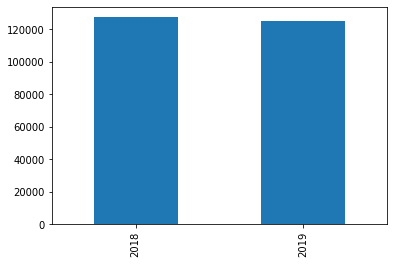

In [44]:
print(raw_tra.YEAR.value_counts())
raw_tra.YEAR.value_counts().plot.bar()

Our dataset has samples from July-2018 to June-2019, total of 12 months of data. Below we examine the number of transactions in each month.

We see highest peak in December 2018, which can be due to Christmas and a sharp unknown decline in the month of Feb 2019. Red line denotes the mean transactions in these twelve months.

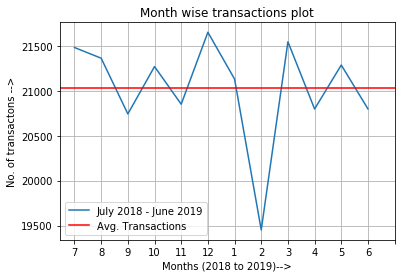

In [45]:
average_trans = raw_tra[['MONTH','YEAR']].groupby('MONTH').count().mean().values[0]

month_wise_trans = raw_tra[raw_tra.YEAR == 2018][['MONTH','YEAR']].groupby('MONTH').count().append(
                        raw_tra[raw_tra.YEAR == 2019][['MONTH','YEAR']].groupby('MONTH').count()
                        )
pd.DataFrame(month_wise_trans.values).rename(columns={0:'July 2018 - June 2019'}).plot()

plt.xticks(range(13), month_wise_trans.index)
plt.axhline(y=average_trans, color='r', linestyle='-', label='Avg. Transactions')
plt.xlabel('Months (2018 to 2019)-->')
plt.ylabel('No. of transactons -->')
plt.title('Month wise transactions plot')
plt.legend()
plt.grid()

plt.show()

<br>

***
<b>Now we will merge purchase data with transactional data to perform further analysis.</b>
***

<br>

In [46]:
df = pd.merge(raw_tra,raw_pur,left_on=['LYLTY_CARD_NBR'], right_on=['LYLTY_CARD_NBR'], how='left')

print(df.shape)
df.head(2)

(252362, 16)


DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                CCs Nacho Cheese    175g         3        6.3        175   

        BRAND_NAME  YEAR  MONTH  M_DAY  Y_DAY               LIFESTAGE  \
0  Natural Chip Co  2018     10     17    290   YOUNG SINGLES/COUPLES   
1              CCs  2019      5     14    134  MIDAGE SINGLES/COUPLES   

  PREMIUM_CUSTOMER  
0          Premium  
1           Budget

In [47]:
df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
YEAR                0
MONTH               0
M_DAY               0
Y_DAY               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

<br>

<b>How much each customer lifestage segment is buying ?</b>

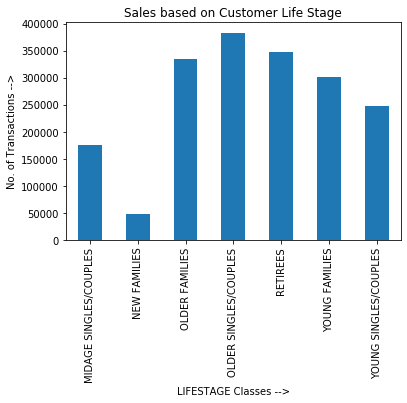

In [48]:
df.groupby('LIFESTAGE')['TOT_SALES'].sum().plot.bar()

plt.title('Sales based on Customer Life Stage')
plt.xlabel('LIFESTAGE Classes -->')
plt.ylabel('No. of Transactions -->')

plt.show()

<table>
    <tbody>
        <tr>
            <th colspan='2'>LIFESTAGE value counts</th>
        </tr>
        <tr>
            <td>OLDER SINGLES/COUPLES</td>
            <td>51932</td>
        </tr>
        <tr>
            <td>RETIREES</td>
            <td>47361</td>
        </tr>
        <tr>
            <td>OLDER FAMILIES</td>
            <td>46300</td>
        </tr>
        <tr>
            <td>YOUNG FAMILIES</td>
            <td>41630</td>
        </tr>
        <tr>
            <td>YOUNG SINGLES/COUPLES</td>
            <td>34627</td>
        </tr>
        <tr>
            <td>MIDAGE SINGLES/COUPLES</td>
            <td>23919</td>
        </tr>
        <tr>
            <td>NEW FAMILIES</td>
            <td>6593</td>
        </tr>
    </tbody>
</table>


<p>From above table we know that number of OLDER SINGLES/COUPLES samples in our dataset is very high, and it could be due to this reason the above figure shows the spending by this customer segment on chips as highest.</p>

<table>
    <tbody>
        <tr
OLDER SINGLES/COUPLES     51932
RETIREES                  47361
OLDER FAMILIES            46300
YOUNG FAMILIES            41630
YOUNG SINGLES/COUPLES     34627
MIDAGE SINGLES/COUPLES    23919
NEW FAMILIES               6593

<b>What are customers from different lifestage segment are buying?</b>

Top 50 products bought by Each Customer Group

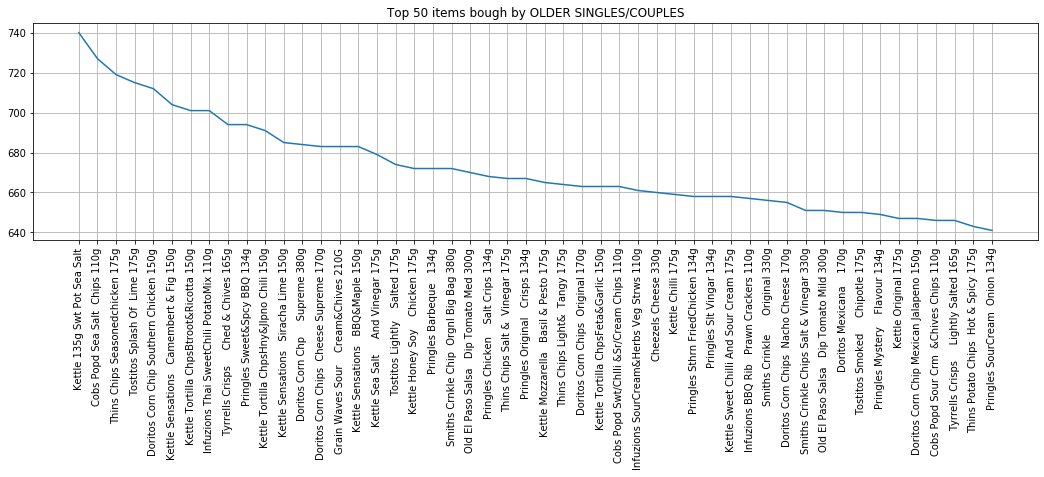

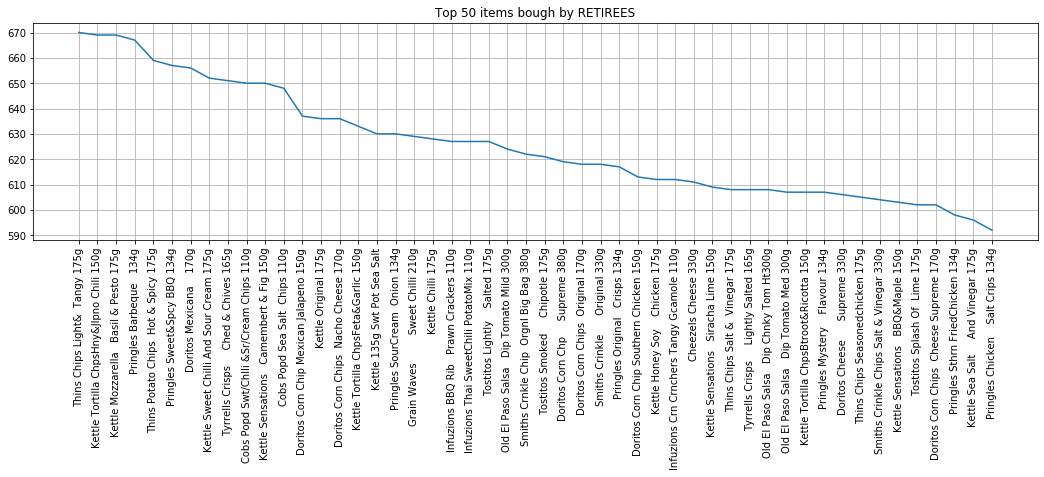

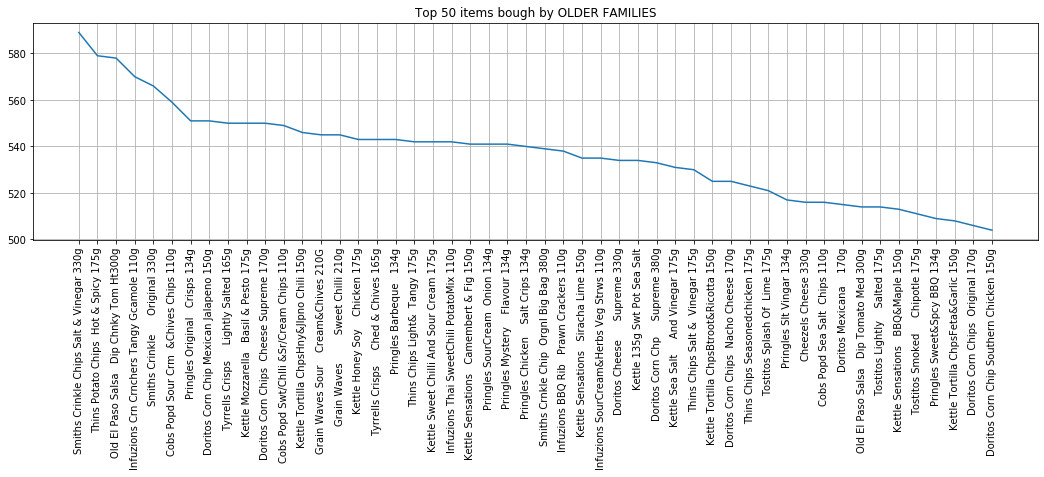

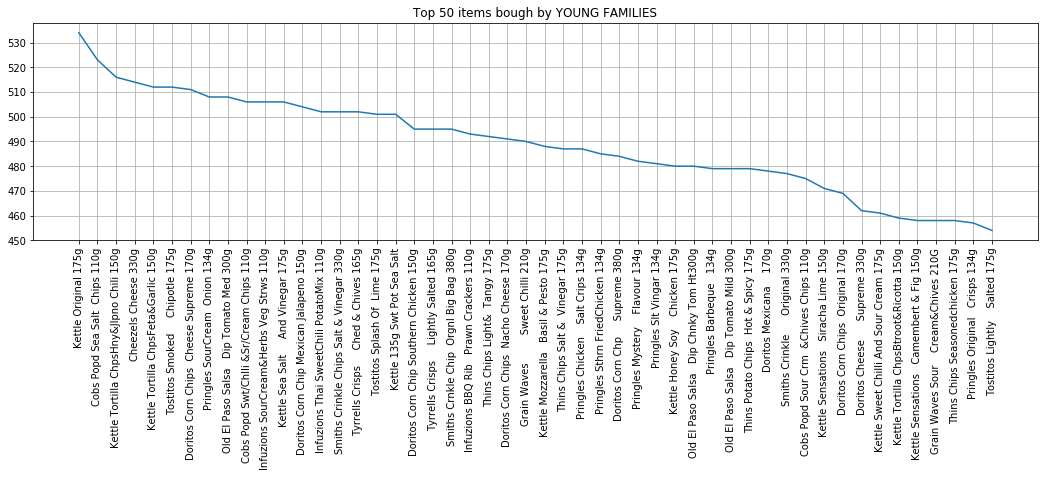

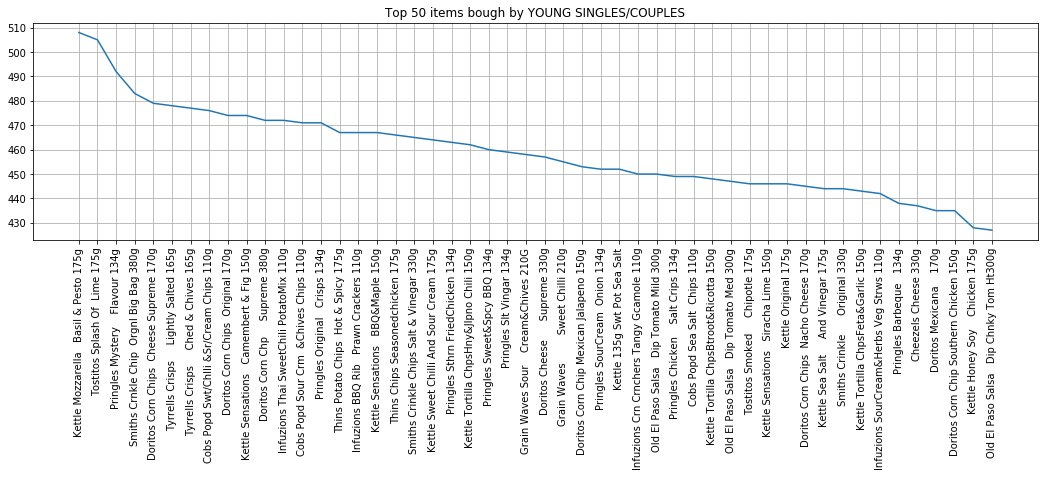

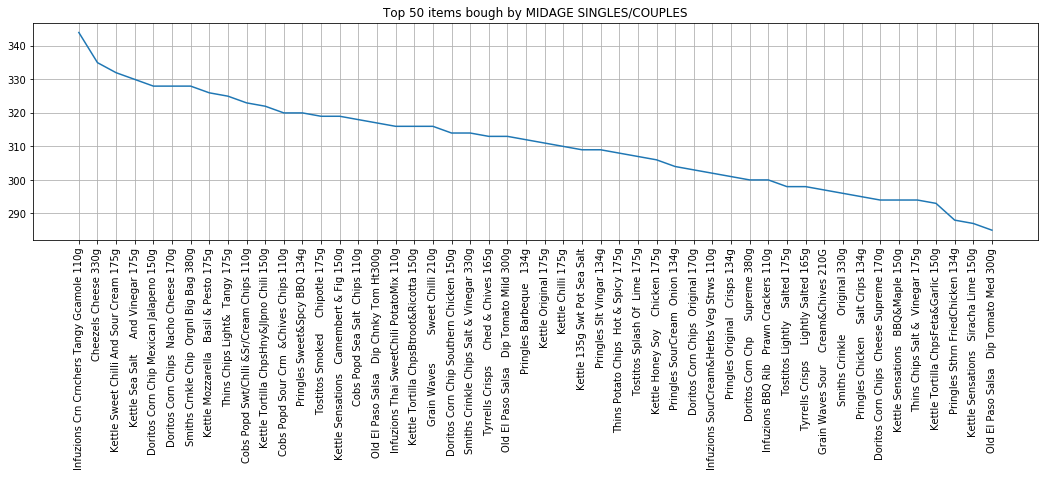

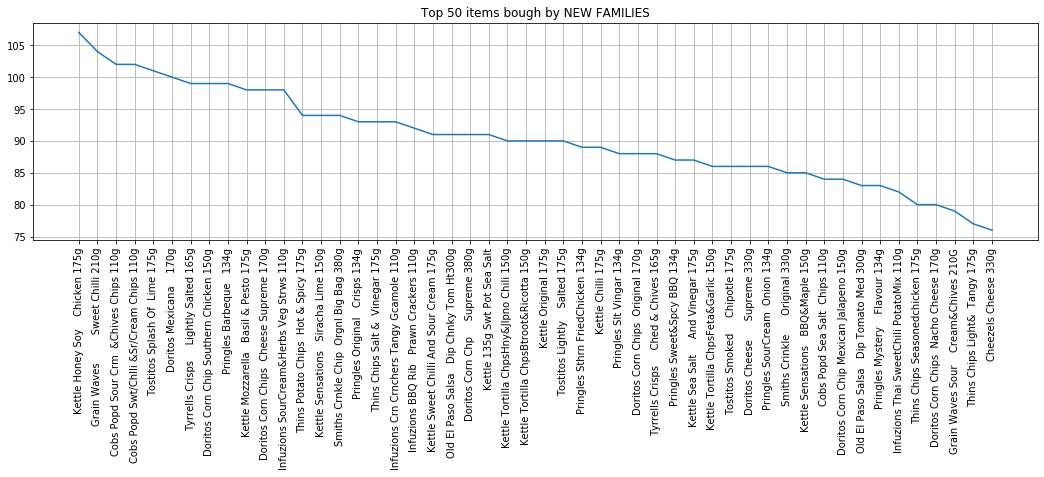

In [49]:
top = 50

for i in df.LIFESTAGE.value_counts().index:
    
    x = df[df.LIFESTAGE == i]['PROD_NAME'].value_counts().iloc[:top]

    plt.figure(figsize=(18,4))
    x.plot()
    plt.xticks(range(len(x)), x.index, rotation=90)
    plt.title('Top %s items bough by %s' % (str(top), i))
    plt.grid()
    
plt.show()

<br>

<b>Brand Preference (by Sales) of each Customer Group</b>

In [50]:
fig = px.sunburst(df, path=['LIFESTAGE','BRAND_NAME'], values='TOT_SALES')
fig.show()

Kettle is the most preferred brand of every customer group. It has maximum sale of 83,862.6 among OLDER SINGLES/COUPLES followed by RETIREES 76,914.8

Overall we see same 4 brands are popular in each group:
* Kettle
* Smiths
* Doritos, and
* Pringles

<br>

<b>Pack sizes preferred by each group</b>

In [51]:
fig = px.sunburst(df, path=['PROD_QTY','LIFESTAGE'], values='TOT_SALES')
fig.show()

<br>

<b>When our customer are buying ?</b>

In [52]:
fig = px.sunburst(df, path=['LIFESTAGE','YEAR','MONTH'], values='TOT_SALES')
fig.show()

At the outset the sales seems to be equally distributed based on number of samples of each customer group in our dataset. Overall we see a slight increase in the year 2018, that can be due to Christmas.

Customers are buying chips throughout the month and 365 days a year.

<br>

<b>No. of transactions of each Customer Segment</b>

Mainstream    97150
Budget        88807
Premium       66405
Name: PREMIUM_CUSTOMER, dtype: int64


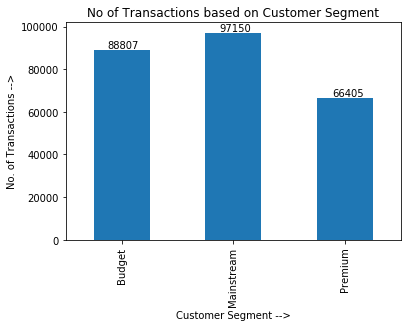

In [53]:
print(df.PREMIUM_CUSTOMER.value_counts())

ax = df.groupby("PREMIUM_CUSTOMER")['LYLTY_CARD_NBR'].count().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), xytext=(14, 1), textcoords='offset points')
    
plt.title('No of Transactions based on Customer Segment')
plt.ylabel('No. of Transactions -->')
plt.xlabel('Customer Segment -->')

plt.show()

<br>

<b>Brand preference of all customer groups from each Segment</b>

In [54]:
fig = px.sunburst(df, path=['PREMIUM_CUSTOMER','LIFESTAGE','BRAND_NAME'], values='TOT_SALES')
fig.show()

In Mainstream segment we have maximum sales by YOUNG SINGLES/COUPLES and they prefer Kettle followed by Doritos. RETIREES and OLDER SINGLES/COUPLES closely follow YOUNG SINGLES in sales with total sales of 147,870.95 and 127,036.3 respectively.

In Budget segment OLDER FAMILIES have maximum purchase of 159,878.45, followed by YOUNG FAMILIES 132,967.45 and OLDER SINGLES/COUPLES with purchase of 130,171.1.

Premium segment highest sales is credited to OLDER SINGLES/COUPLES 125,813.45, followed by RETIREES 92,572.85 and YOUNG FAMILIES 80,082.9

***If we can have a feature which denotes the profit on each sale then we can perform a t-test on our hypothesis of the most profitable segment.***

<br>

<b>Customer segments that are buying more than once</b>

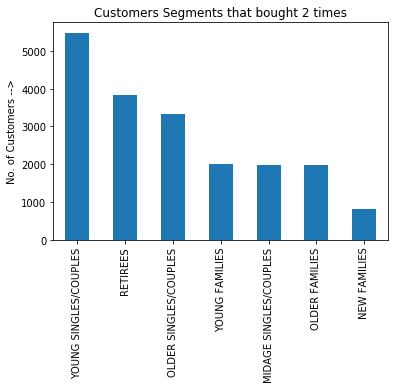

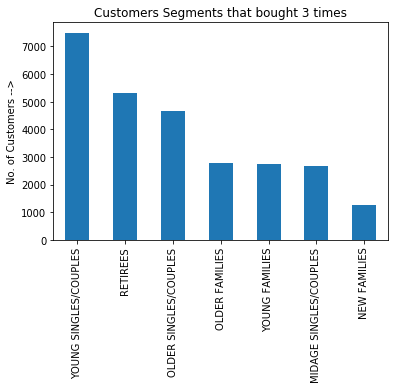

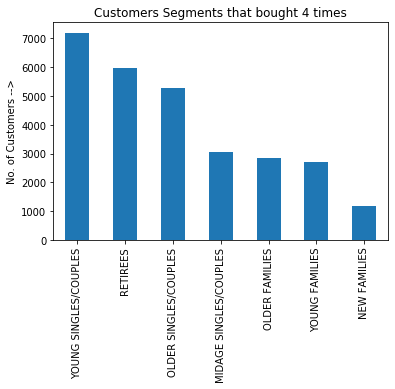

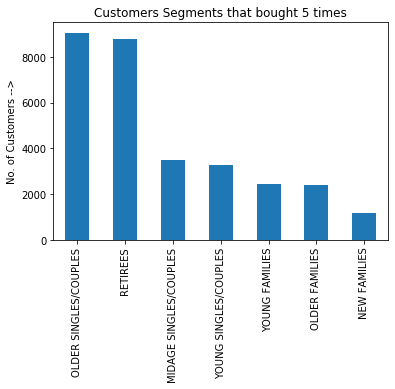

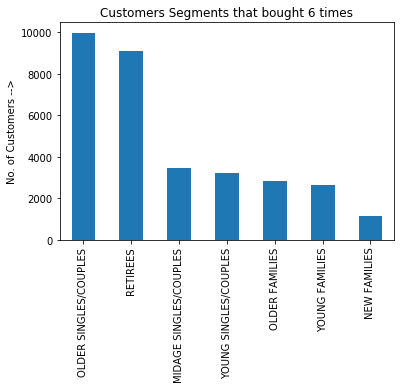

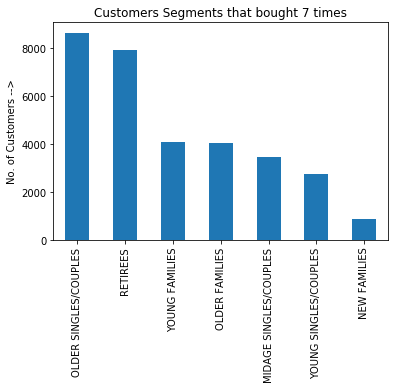

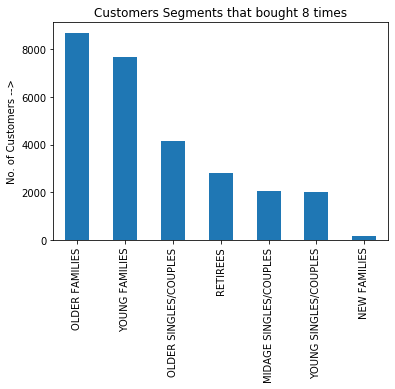

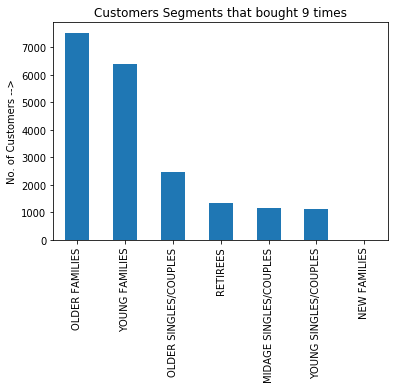

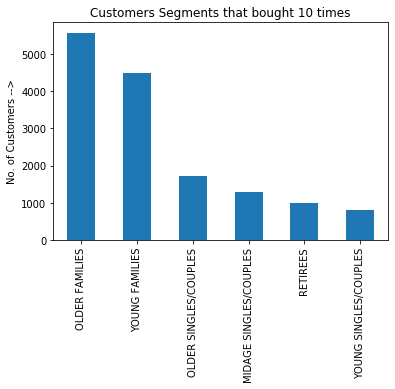

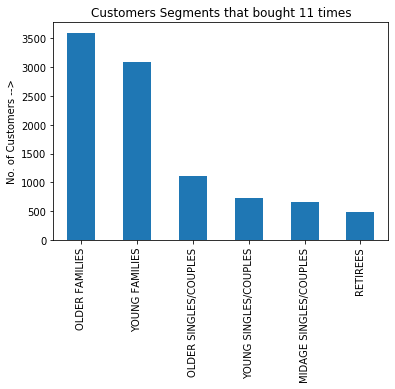

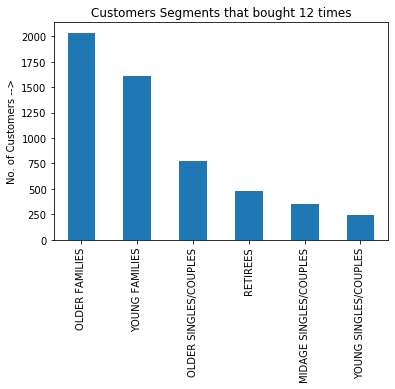

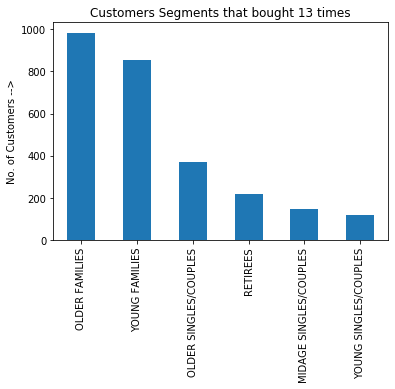

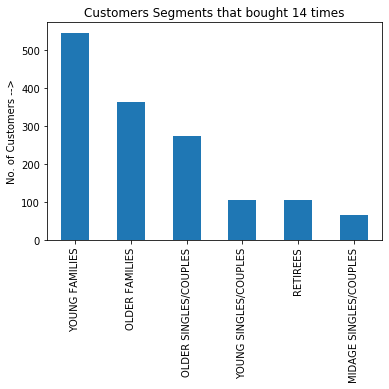

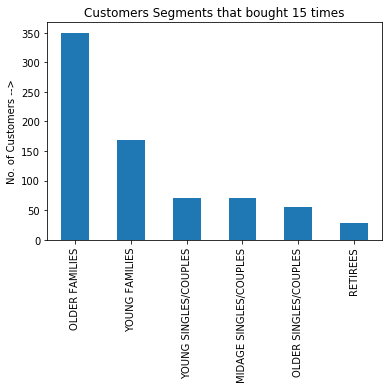

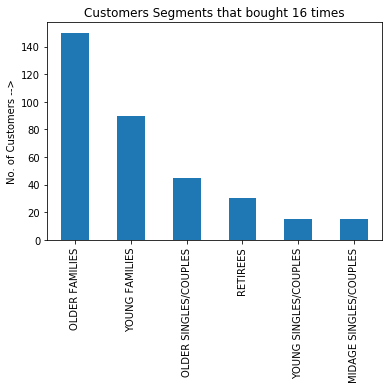

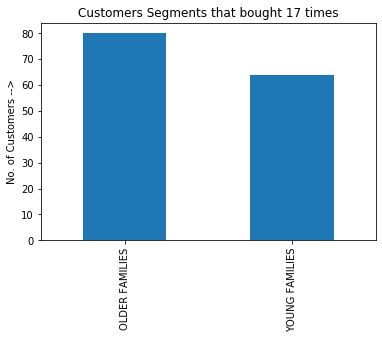

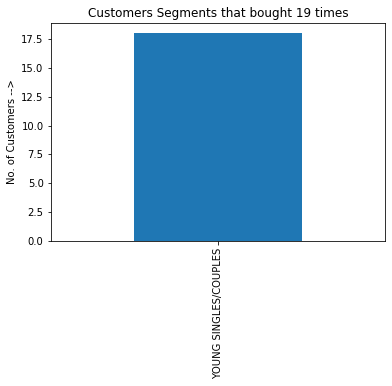

In [55]:
dframe = pd.DataFrame(df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].count())


for i in dframe.TOT_SALES.value_counts().index:
    df[df['LYLTY_CARD_NBR'].isin(dframe[dframe.TOT_SALES == i ].index)]['LIFESTAGE'].value_counts().plot.bar()
    plt.title('Customers Segments that bought ' + str(i+1) + ' times')
    plt.ylabel('No. of Customers -->')
    plt.show()


OLDER FAMILIES and YOUNG FAMILIES seems to buy again and again. One reason can be due to the stability of life among older families, they have settled in a particular geographical location.

In [56]:
dataframe = df[df['LYLTY_CARD_NBR'].isin(dframe[dframe.TOT_SALES > 1 ].index)]

fig = px.sunburst(dataframe, path=['PREMIUM_CUSTOMER','LIFESTAGE'], values='TOT_SALES')
fig.show()

From <b>recurring customers</b> customers:
* Mainstream segment has maximum sales. Under mainstream RETIREES are purchasing maximum.
* Mainstream is followed by Budget segment of recurring customers, where OLDER FAMILIES purchase maximum
* In Premium segment OLDER SINGLES/COUPLES has maximum sales

***
We this we end our basic analysis.